In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
base_path = '/Users/mathiaspoulsen/Python-projects/docker_notebooks/notebooks/my_work/exam-selenium-momondo-tester/'
italy_df = pd.read_csv(base_path + 'exam-data/flight-scrape-single-5-maj-118cy.csv')
cypern_df = pd.read_csv(base_path + 'exam-data/flight-scrape-single-5-maj-63cy.csv')
france_df = pd.read_csv(base_path + 'exam-data/flight-scrape-single-5-maj-82cy.csv')
spain_df = pd.read_csv(base_path + 'exam-data/flight-scrape-single-5-maj-225cy.csv')
greece_df = pd.read_csv(base_path + 'exam-data/flight-scrape-single-5-maj-94cy.csv')






In [51]:
frames = [italy_df, cypern_df, france_df, spain_df, greece_df]
result_df = pd.concat(frames)
result_df

,Unnamed: 0,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp
0,0,118cy,14 juli,6t. 10min.,1 stop WAW,14:00–20:10,Wizz Air,\n471 kr.,https://kayak.dk/s/clickthrough.jsp?ctyp=Spons...,20220505-1343
1,1,118cy,14 juli,2t. 05min.,direkte,18:20–20:25,Ryanair,\n782 kr.,https://kayak.dk/book/flight?code=LPFCjpVNKf.j...,20220505-1343
2,2,118cy,14 juli,27t. 50min.,1 stop WAW-WMI,14:00–17:50+1,"Wizz Air, Ryanair",\n417 kr.,https://kayak.dk/book/flight?code=LPFCjpVNKf.4...,20220505-1343
3,3,118cy,14 juli,2t. 40min.,direkte,18:20–21:00,Ryanair,\n726 kr.,https://kayak.dk/book/flight?code=LPFCjpVNKf.0...,20220505-1343
4,4,118cy,14 juli,2t. 35min.,direkte,18:10–20:45,Norwegian,\n852 kr.,https://kayak.dk/book/flight?code=LPFCjpVNKf.0...,20220505-1343
...,...,...,...,...,...,...,...,...,...,...
114,114,94cy,14 juli,19t. 25min.,1 stop SAW,12:45–09:10+1,Pegasus Airlines,\n1.742 kr.,https://kayak.dk/book/flight?code=LPHiEvhQsj.y...,20220505-1359
115,115,94cy,14 juli,28t. 00min.,1 stop SAW,12:45–17:45+1,Pegasus Airlines,\n1.784 kr.,https://kayak.dk/book/flight?code=LPHiEvhQsj.t...,20220505-1359
116,116,94cy,14 juli,28t. 50min.,1 stop OSL,15:30–21:20+1,Norwegian,\n1.902 kr.,https://kayak.dk/book/flight?code=LPHiEvhQsj.t...,20220505-1359
117,117,94cy,14 juli,13t. 15min.,1 stop ATH,17:30–07:45+1,Aegean Airlines,\n1.903 kr.,https://kayak.dk/book/flight?code=LPHiEvhQsj.t...,20220505-1359


In [16]:
result_df.describe()

,Unnamed: 0
count,545.000000
mean,54.115596
std,31.701727
min,0.000000
25%,27.000000
50%,54.000000
75%,81.000000
max,118.000000


In [17]:
#Check for duplicated entries
boolean = result_df.duplicated().any()
print(boolean)

False


In [52]:
#price_int = int(price.text.replace(".", "")[:-3])  # cut .kr + .
#df["A"].str.replace("[ab]","")
#df['result'] = [x[1:-1] for x in df['result']]
result_df['Price'] = [x[1:-5].replace(".","") for x in result_df['Price']]
result_df['Price'] = pd.to_numeric(result_df['Price'])

In [19]:
result_df = result_df.sort_values(by=['Price'], ascending=False)

In [20]:
result_df['Price']

25     5203
105    4784
83     4730
104    4679
82     4667
       ... 
2       493
0       471
17      463
2       418
2       417
Name: Price, Length: 545, dtype: int64

In [21]:
result_df["Price"].mean()

1741.332110091743

In [53]:
#Wizz Air, Ryanair
#Wizz Air","Ryanair
#["Wizz Air","Ryanair"]
list1 = ['foo', 'fob', 'faz', 'funk']
list2 = [ls+"bar" for ls in list1] # using list comprehension
test_list = []


def manipulate_list(x):
    x = '["' + x + '"]' 
    x = x.replace(', ', '","')
    return x

result_df['Company names'] = result_df['Company names'].apply(manipulate_list)
result_df['Company names'] = result_df['Company names'].apply(eval)
result_df['Company names']



0               [Wizz Air]
1                [Ryanair]
2      [Wizz Air, Ryanair]
3                [Ryanair]
4              [Norwegian]
              ...         
114     [Pegasus Airlines]
115     [Pegasus Airlines]
116            [Norwegian]
117      [Aegean Airlines]
118     [Turkish Airlines]
Name: Company names, Length: 545, dtype: object

In [54]:
for i, l in enumerate(result_df['Company names']):
    print(type(l))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

In [55]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

to_1D(result_df['Company names']).value_counts()

Lufthansa             85
Ryanair               85
Aegean Airlines       64
SAS                   51
easyJet               43
Norwegian             40
Wizz Air              34
KLM                   32
Vueling               25
SWISS                 25
Austrian Airlines     21
Air France            18
Finnair               16
British Airways       15
LOT                   15
Flere flyselskaber    14
Eurowings             13
Brussels Airlines     11
Air Serbia             7
airBaltic              6
Turkish Airlines       5
Volotea                4
Croatia Airlines       4
Pegasus Airlines       4
Iberia                 4
TAP AIR PORTUGAL       3
Air Europa             2
ITA Airways            2
Arkia                  2
CityJet                2
Cyprus Airways         1
Olympic Air            1
dtype: int64

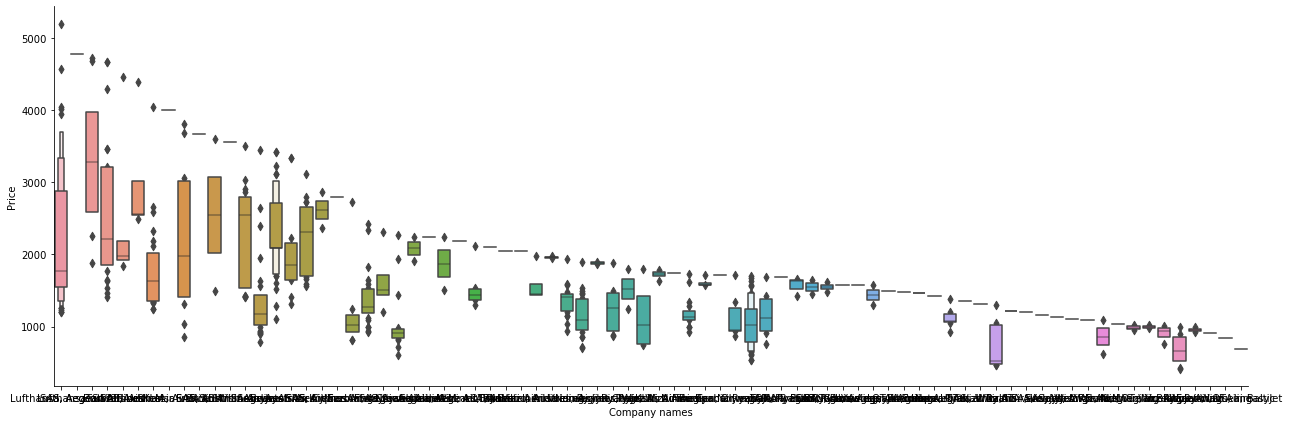

In [22]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Company names", data = result_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()